In [2]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_table("predicted_vs_true.tsv")
df

,Acession code,Predicted,True,Score
0,Q13015,0,0,-1.058
1,P04921,0,0,3.303
2,Q8BG31,0,0,0.200
3,Q03482,0,0,1.997
4,O94428,0,0,0.148
...,...,...,...,...
2119,P05367,1,1,10.104
2120,P31723,1,1,7.381
2121,P16150,1,1,7.737
2122,Q05928,1,1,7.884


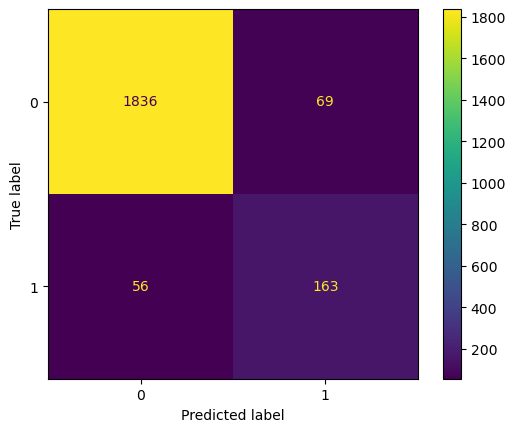

In [3]:
y_true=df["True"].to_list()
y_pred=df["Predicted"].to_list()
cm=metrics.confusion_matrix(y_true,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(cm).plot()

In [4]:
df["Transit peptide"]=0
df["Transmembrane"]=0

In [6]:
df_transmem_transit=pd.read_table("transit_transmem.tsv", header=None)
df_transmem_transit.rename(columns={0:"Acession code", 1:"Transit peptide", 2:"Transmembrane"}, inplace=True)

In [7]:
conditions = [
    (df['True'] == 1) & (df['Predicted'] == 1),
    (df['True'] == 0) & (df['Predicted'] == 0),
    (df['True'] == 0) & (df['Predicted'] == 1),
    (df['True'] == 1) & (df['Predicted'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['TP', 'TN', 'FP', 'FN']

df['Test result'] = np.select(conditions, values)

In [37]:
df_merged=df.merge(df_transmem_transit, on='Acession code', how='left')
df_merged.drop(columns=['Transit peptide_x', 'Transmembrane_x'], inplace=True)
df_merged.fillna(0, inplace=True)
df_merged["Transit peptide_y"]=df_merged["Transit peptide_y"].astype(int)
df_merged["Transmembrane_y"]=df_merged["Transmembrane_y"].astype(int)

df_group_TR=df_merged.groupby(['Test result',  "Transit peptide_y","Transmembrane_y"]).count()

df_group_TR.drop(columns=['Predicted', 'True', "Score"], inplace=True)
df_grouped_drop=df_group_TR.drop(["FN","TP"])
df_grouped_drop

Acession code
Test result Transit peptide_y Transmembrane_y               
FP          0                 0                           30
                              1                           10
            1                 0                           29
TN          0                 0                         1495
                              1                          209
            1                 0                          120
                              1                           12

In [70]:
df_FP=pd.DataFrame(df_grouped_drop.loc[("FP")].value_counts())
df_FP=df_FP.reset_index()
df_FP["index"]=["Transmembrane","Transit peptide","None"]
df_FP=df_FP.set_index(df_FP["index"])

In [109]:
df_TN=pd.DataFrame(df_grouped_drop.loc[("TN")].value_counts())
df_TN=df_TN.reset_index()
df_TN["index"]=["Both","Transit peptide","Transmembrane","None"]
df_TN=df_TN.set_index(df_TN["index"])

In [133]:
property_colors={
    'True negatives (TN)': "#758173",
    'False positives (FP)': "#828C51",
    }

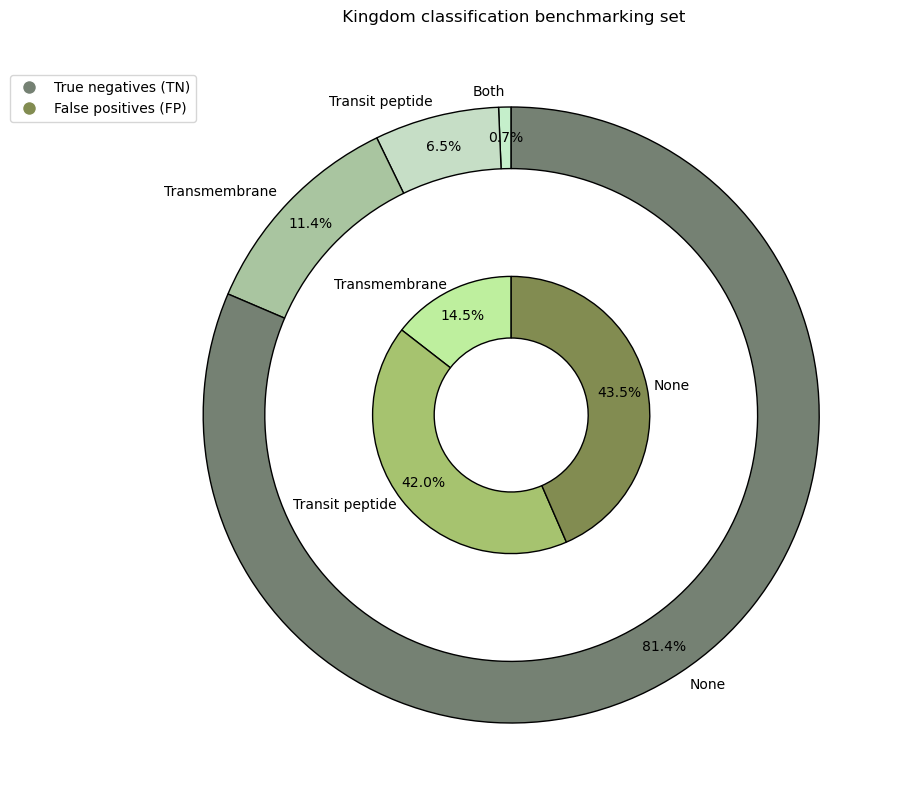

In [134]:
colors1=["#C5EFCB","#C6DEC6","#A9C5A0","#758173"]
colors2=["#BEEF9E","#A6C36F","#828C51"]
explode = (0.03,0.03,0.03,0.03)

plt.figure(figsize=(14,10))
plt.title(" Kingdom classification benchmarking set")

plt.pie(df_TN["Acession code"], labels=df_TN.index, labeldistance=1.05,radius=1, shadow=False, autopct="%.1f%%", wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.9, textprops={'color':'Black'}, colors=colors1 )
plt.pie(df_FP["Acession code"],labels=df_FP.index, radius=0.45, labeldistance=1.05 ,shadow=False, autopct="%.1f%%",  wedgeprops=dict(width=0.2, edgecolor='Black'), startangle=90,pctdistance=0.8,  textprops={'color':'Black'}, colors=colors2)
legend_labels = {color: property for property, color in property_colors.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                  for color, label in legend_labels.items()]
plt.legend(handles=legend_handles,  bbox_to_anchor=(0.1,0.95))

plt.show()

# False negatives

In [4]:
df=df[df["True"]==1]
df=df[df["Predicted"]==0]
df

,Acession code,Predicted,True,Score
1907,P98066,0,1,5.295
1909,P13917,0,1,4.542
1910,P01909,0,1,6.072
1912,Q6X4U4,0,1,6.227
1915,P09586,0,1,3.809
1920,Q8TDQ1,0,1,6.148
1925,B5LZ79,0,1,4.776
1927,P01920,0,1,6.100
1935,P15226,0,1,4.414
1937,P86798,0,1,6.232


In [15]:
list_FN=df["Acession code"].to_list()

In [11]:
bench_df=pd.read_table("benchmarking_set_parsed_totc.tsv", names=["SP", "sequence", "class", "code"])
bench_df

,SP,sequence,class,code
0,NaN,MRDPVSSQYSSFLFWRMPIPELDLSELEGLGLSDTATYKVKDSSVG...,0,Q13015
1,NaN,MWSTRSPNSTAWPLSLEPDPGMASASTTMHTTTIAEPDPGMSGWPD...,0,P04921
2,NaN,MHQIYSCSDENIEVFTTVIPSKVSSSSRRRVKSSHHLLAKNVVIES...,0,Q8BG31
3,NaN,MSQQQGYYQQGPPQQGYYQQGPPQQGYYQQGPPQQGYPQQQPVYVQ...,0,Q03482
4,NaN,MRMDGSDFEDRKVSKPSPVLPFDVSNIGDLSQGVHSPLGISHFDSK...,0,O94428
...,...,...,...,...
2119,19.0,MKLLTSLVFCSLLLGVCHGGFFSFIGEAFQGAGDMWRAYTDMKEAG...,1,P05367
2120,35.0,MRLPVSFPLTVLSLLGSTIAHPYGETEAVLRSEPKSNQAKADAVKE...,1,P31723
2121,19.0,MATLLLLLGVLVVSPDALGSTTAVQTPTSGEPLVSTSEPLSSKMYT...,1,P16150
2122,31.0,MDPTAPGSSVSSLPLLLVLALGLAILHCVVADGNTTRTPETNGSLC...,1,Q05928


In [17]:
result=bench_df[bench_df["code"].isin(list_FN)]
result

,SP,sequence,class,code
1907,17.0,MIILIYLFLLLWEDTQGWGFKDGIFHNSIWLERAAGVYHREARSGK...,1,P98066
1909,24.0,MASILHYFLALSLSCSFLFFLSDSVTPTKPINLVVLPVQNDGSTGL...,1,P13917
1910,23.0,MILNKALMLGALALTTVMSPCGGEDIVADHVASYGVNLYQSYGPSG...,1,P01909
1912,23.0,MLPPAIHFYLLPLACILMKSCLAFKNDATEILYSHVVKPVPAHPSS...,1,Q6X4U4
1915,31.0,MKLSLSQPCSFSGALLLLAVSNLLVWEKVTSLPNYRLPTESLYQRV...,1,P09586
1920,19.0,MPLLTLYLLLFWLSGYSIVTQITGPTTVNGLERGSLTVQCVYRSGW...,1,Q8TDQ1
1925,30.0,MVLNNKTALWFMTLVLLLLSSREMVPGAEARLCRVRGTRGHCFNDH...,1,B5LZ79
1927,32.0,MSWKKALRIPGGLRAATVTLMLAMLSTPVAEGRDSPEDFVYQFKAM...,1,P01920
1935,20.0,MKGMILFISCLLLIGIVVECKEGYLMDHEGCKLSCFIRPSGYCGRE...,1,P15226
1937,19.0,MKHLIPLIVMASVVLAVYADRGYGGGRRGGGYGGGGYGGGGYGGGG...,1,P86798


In [20]:
SP_length=result["SP"].to_list()
seq=result["sequence"].to_list()

In [29]:
cleavage_site_FN=[]

for i in range(len(SP_length)):
    cleavage_site=seq[i][int(SP_length[i])-13:int(SP_length[i])+2]
    cleavage_site_FN.append(cleavage_site)
cleavage_site_FN

['IYLFLLLWEDTQGWG',
 'SLSCSFLFFLSDSVT',
 'ALALTTVMSPCGGED',
 'LPLACILMKSCLAFK',
 'AVSNLLVWEKVTSLP',
 'YLLLFWLSGYSIVTQ',
 'LLSSREMVPGAEARL',
 'LMLAMLSTPVAEGRD',
 'ISCLLLIGIVVECKE',
 'LIVMASVVLAVYADR',
 'WMSALFLGVGVRAEE',
 'LLGIFLRVGFLQALT',
 'LGLTLVLYASLQAEE',
 'VILAMSYITSIFANN',
 'VALLFSHVDHISAET',
 'FAVGIMLSMRASAFT',
 'VSLLLPKAFLSRGKR',
 'MLILQIRIQLSEESE',
 'ILLLLLKVYQGKGCQ',
 'AIPFFLLITIALGTK',
 'FLVIMVISSLVDCAK',
 'FILCSTCYISVDSQI',
 'LFTTFVLFSLADARI',
 'YLLFNAMTALTEEAA',
 'IILLISKALSVGAQF',
 'ALLVVTVRHRAHAMA',
 'IAIFVLMVEPGECGW',
 'FIVTMLIVDEVNSFK',
 'IAASCYILVCSHAKS',
 'LFLIITSCVISSGNL',
 'LLVQIWALQEASSLS',
 'ILLFFMLIRLGQLYP',
 'GCLFLMGAMIGDAYS',
 'AVTLFAVITSSTCKK',
 'VLCVGSLVIFSEGSI',
 'SLHLLLLIVMTASHT',
 'LPLLAQIFACAFGDA',
 'FLTLISLPPPGASIS',
 'YIIVSLITTMTIGTP',
 'FVIFFFFLTESLTLP',
 'SVILISRISSVGGEA',
 'VIMCIFYMPTVNSLP',
 'VHVAAMLASQTEAFV',
 'ASIALMKLENVYSAT',
 'AIIFAIMTTLTSAKN',
 'YTLITAFLIGVQAEP',
 'VNILALTLPFLGAEV',
 'KIICLMLWAICVAED',
 'LIPAMAFLSCVRPES',
 'TASFVLSLGFVKAEP',


In [31]:
cleavage_sites_FN=pd.DataFrame(cleavage_site_FN)
cleavage_sites_FN.to_csv("FN_for_sequence_logo.tsv", sep="\t")

#on shell
# cut -f 2 FN_for_sequence_logo.tsv | grep -v "0"